In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load true and fake news datasets
true_df = pd.read_csv('/content/True.csv')
fake_df = pd.read_csv('/content/Fake.csv')

# Label data: 0 for true news, 1 for fake news
true_df['label'] = 0
fake_df['label'] = 1

# Combine the datasets
df = pd.concat([true_df, fake_df]).reset_index(drop=True)
df['content'] = df['title'] + " " + df['text']  # Merge title and text if both are available

# Drop unnecessary columns to simplify
df = df[['content', 'label']]

In [ ]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  44898 non-null  object
 1   label    44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
None


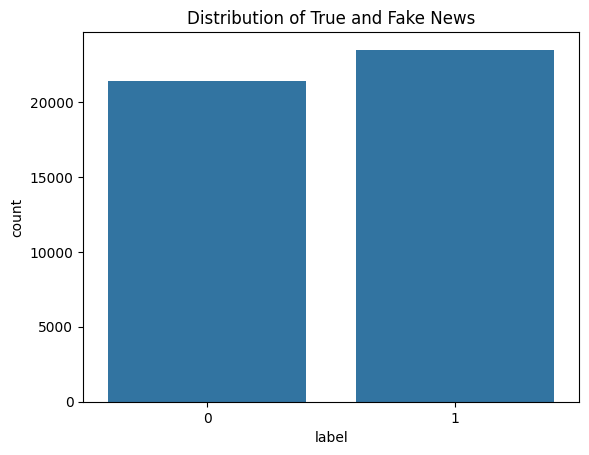

Missing Values per Column:
content    0
label      0
dtype: int64


In [ ]:
# Display data types and null values
print(df.info())

# Checking the balance of true vs fake news
sns.countplot(x='label', data=df)
plt.title("Distribution of True and Fake News")
plt.show()

# Checking for any missing values
print("Missing Values per Column:")
print(df.isnull().sum())


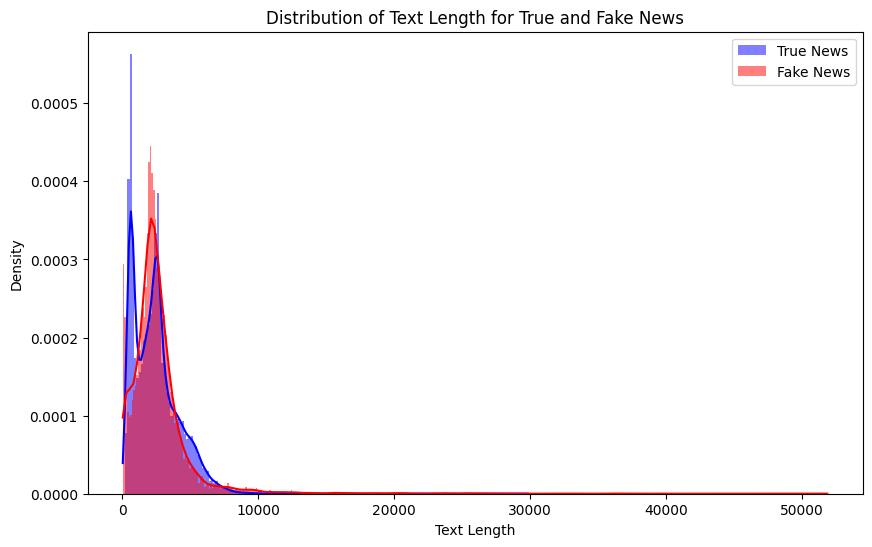

In [ ]:
# Create a column for text length
df['text_length'] = df['content'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['text_length'], color='blue', label='True News', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['label'] == 1]['text_length'], color='red', label='Fake News', kde=True, stat="density", linewidth=0)
plt.legend()
plt.title("Distribution of Text Length for True and Fake News")
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.show()

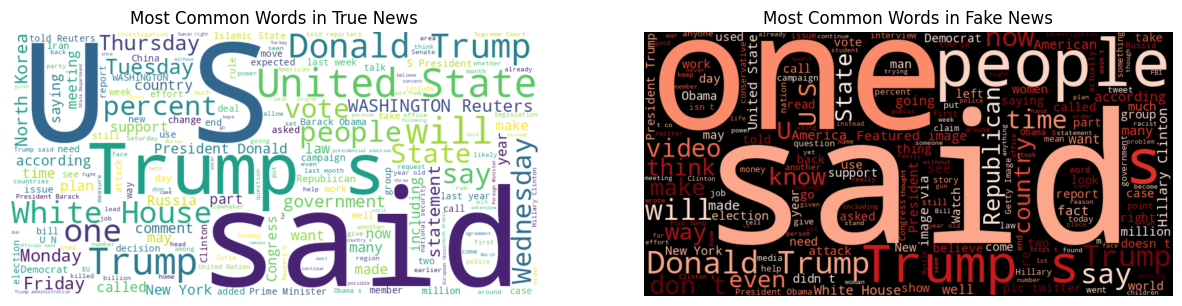

In [ ]:
# Word cloud for true news
true_text = " ".join(df[df['label'] == 0]['content'].tolist())
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Word cloud for fake news
fake_text = " ".join(df[df['label'] == 1]['content'].tolist())
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)

# Plotting the word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in True News")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Fake News")

plt.show()

In [ ]:
# Vectorize text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['content'])
y = df['label']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 98.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4330
           1       0.99      0.98      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



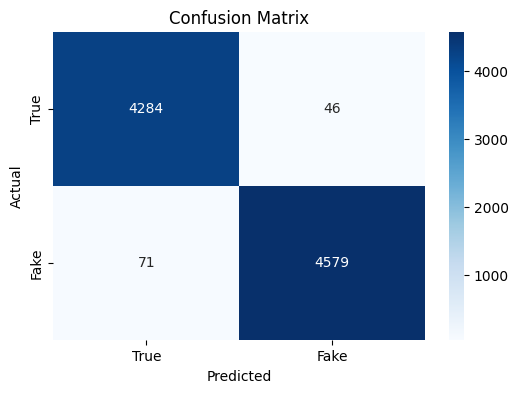

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

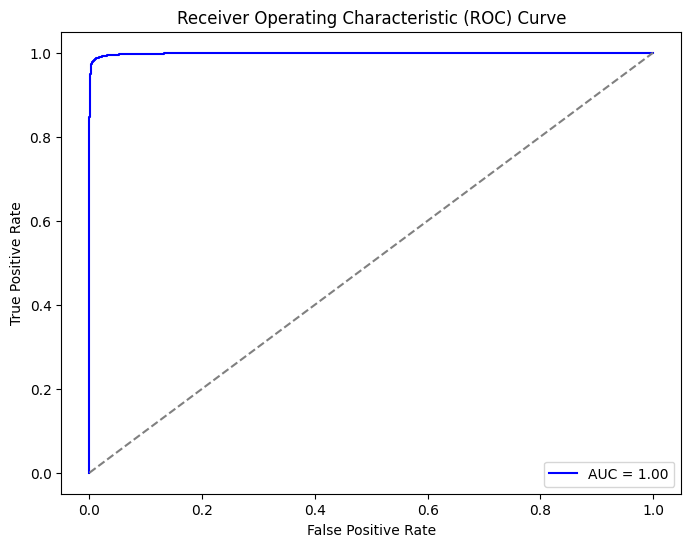

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Sample Data

In [ ]:
# Load the sample news data
sample_df = pd.read_csv('/content/sample_news.csv')

# Display the first few rows to check the format
print(sample_df.head())

   Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written exten

In [ ]:
# Combine 'headline' and 'news' columns to create the 'content' column
sample_df['content'] = sample_df['headline'] + " " + sample_df['news']

# Fill any missing values in the 'content' column with an empty string
sample_df['content'] = sample_df['content'].fillna('')

# Transform the sample data using the existing TF-IDF vectorizer
sample_content_transformed = tfidf.transform(sample_df['content'])

# Predict using the trained model
sample_predictions = model.predict(sample_content_transformed)

# Add predictions to the sample dataset for easy viewing
sample_df['prediction'] = sample_predictions
sample_df['prediction'] = sample_df['prediction'].map({1: 'Fake', 0: 'Real'})  # Map 1 to 'Fake' and 0 to 'Real'

In [ ]:
# Display 20 random rows from the sample dataset with predictions
print(sample_df[['content', 'prediction']].sample(20))

                                                 content prediction
19164  Israel to Make Rare Overture to Palestinians ’...       Real
13402  Anonymous Issues Warning To ND Governor Over D...       Fake
4234   Evergreen President ’Deeply Disappointed’ by P...       Fake
6737   Gold & The Dollar Moving In Tandem? Fund Manag...       Fake
20524  WaPo: Steve Bannon’s Navy Service During Carte...       Real
15251  Al Pacino to Play Penn State Coach Joe Paterno...       Fake
7762   Hard Truth About Violence at Trump Rallies You...       Fake
12975  McCain: ‘I Don’t Know’ If Trump-Russia Dossier...       Fake
202    Sean Spicer Repeats Trump’s Unproven Wiretappi...       Fake
6457   The #1 Reason Why People Are Voting for Trump ...       Fake
15715  Celebs Love to Share Their Political Views - B...       Fake
10003  Arctic’s Winter Sea Ice Drops to Its Lowest Re...       Fake
13720  Internet at Risk! Don't Trust those With Good ...       Fake
7909   On Vacation. How to Keep the Boss at Bay?